## Sec. 3.2 Transformations and adjustments

Adjusting the historical data can often lead to a simpler forecasting task. 
- calendar adjustments
- population adjustments
- inflation adjustments
- mathematical transformations

In [1]:
import pandas as pd
import datetime as dt
from calendar import monthrange

# from math import pi
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'

### Calendar adjustments

In [2]:
milk = pd.read_csv('../data/milkdata.csv')
milk['index'] = pd.date_range('1962-01','1976-01', freq='M')
milk.set_index('index', inplace=True)

# 각 월별 일(day)수가 다르므로 일수로 나누어 하루 평균값을 구하여 살펴봄
milk['Daily_average'] = milk['value']/[monthrange(idx.year,idx.month)[1] for idx in milk.index]

milk

,value,Daily_average
index,,
1962-01-31,589,19.000000
1962-02-28,561,20.035714
1962-03-31,640,20.645161
1962-04-30,656,21.866667
1962-05-31,727,23.451613
...,...,...
1975-08-31,858,27.677419
1975-09-30,817,27.233333
1975-10-31,827,26.677419


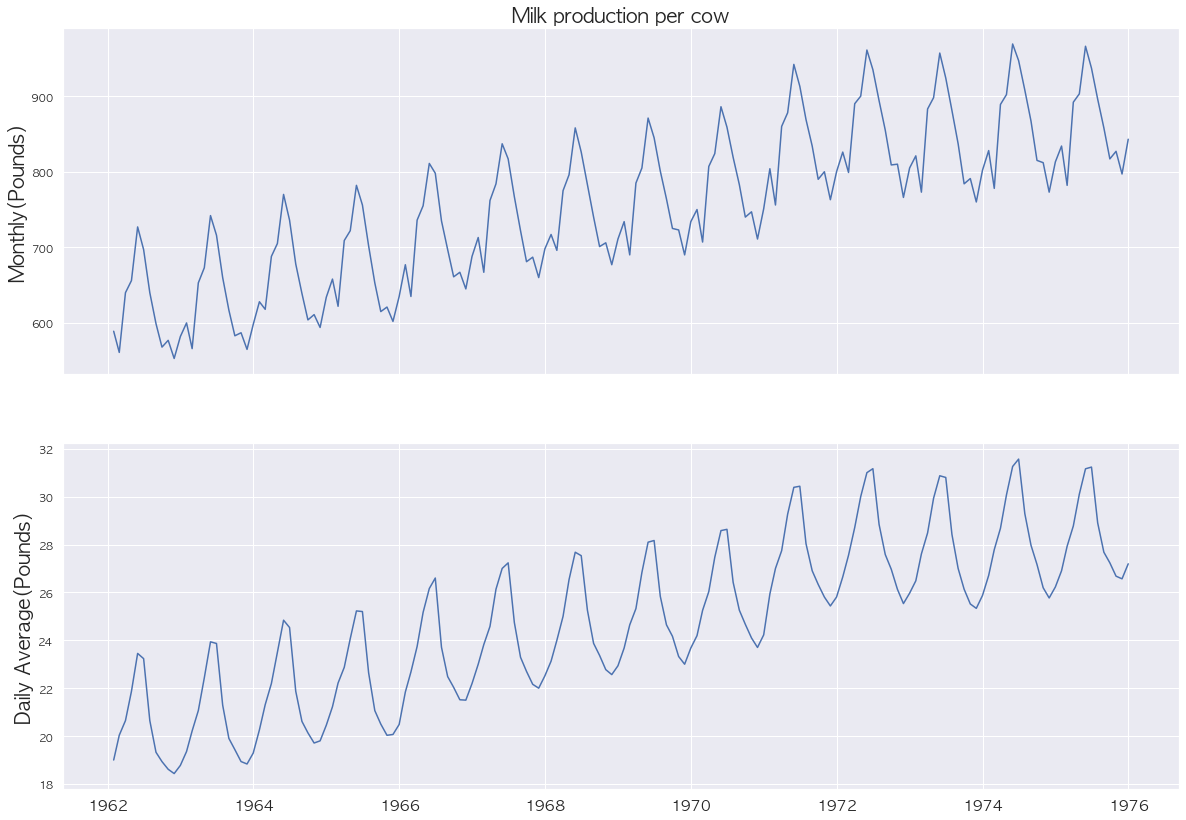

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(20, 14))
ax1 = plt.subplot(211)
plt.plot(milk['value'])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Monthly(Pounds)',fontsize=20)
plt.title('Milk production per cow', fontsize=20)

ax2 = plt.subplot(212)
plt.plot(milk['Daily_average'])
plt.setp(ax2.get_xticklabels(), fontsize=15)
plt.ylabel('Daily Average(Pounds)',fontsize=20)

plt.show()


### Population adjustments

관찰값이 인구변화에 영향을 받는 경우, 1인당(또는 100명당, 1000명 당) 데이터로 변환하여 인구 변화율에 대한 영향을 제거할 수 있음

### Inflation adjustments
가격을 다룰 때, 연도별 돈의 가치가 달라지므로 가격 지수(또는 소비자 가격 지수 CPI)를 이용하여 환산하여 사용 함
$$x_t = y_t/z_t * z_T$$
- 연도 $t$의 가격을 연도 $T$의 가치로 환산하
- $z_t$: 연도 $t$의 가격 지수, $z_T$: 연도 $T$의 가격 지수
- $y_t$: 연도 $t$의 가격, $x_t$: 연도 $T$의 가치로 환산한 가격 

### Mathematical transformations - back transformation
- **Log transformation**
    $$w_t = \log_a(y_t) \quad \longleftrightarrow \quad y_t = a^{w_t}$$



- **Power transformation**
    $$w_t = y_t^p \quad \longleftrightarrow \quad y_t = w_t^{1/p}$$
    - If some $y_t \le 0$, no power transformation is possible unless all observations are adjusted by adding a constant to all values.
    - Transformations sometimes make little difference to the forecasts but have a large effect on prediction intervals.
    


- **Box-Cox transformation**
    $$
        w_t=
        \begin{cases}
        \ln(y_t) \qquad \,\text{if}\,\, \lambda=0 \\
        (y_t^{\lambda}-1)/\lambda \quad\text{otherwise}
        \end{cases}
    $$
    - A good value of $\lambda$ is one which makes the size of the seasonal variation about the same across the whole series, as that makes the forecasting model simpler. 
    - Choose a simple value of $\lambda$. It makes explanations easier.
    - The forecasting results are relatively insensitive to the value of $\lambda$.
    - Inverse transformation
    $$
        y_t=
        \begin{cases}
        \exp(w_t) \qquad \,\text{if}\,\, \lambda=0 \\
        (\lambda w_t + 1)^{1/\lambda} \quad\text{otherwise}
        \end{cases}
    $$  

In [4]:
elec = pd.read_csv('../data/elecdata.csv')
elec['index'] = pd.date_range('1956-01','1995-09', freq='M')
elec.set_index('index', inplace=True)
elec

,value
index,
1956-01-31,1254
1956-02-29,1290
1956-03-31,1379
1956-04-30,1346
1956-05-31,1535
...,...
1995-04-30,13032
1995-05-31,14268
1995-06-30,14473


In [5]:
lam = 0.2654
if lam == 0:
    transf = np.log(elec['value'])
else:
    transf = (np.power(elec['value'], lam) - 1 )/lam
    
elec['Transformed'] = transf
elec   

,value,Transformed
index,,
1956-01-31,1254,21.257861
1956-02-29,1290,21.446558
1956-03-31,1379,21.896994
1956-04-30,1346,21.732541
1956-05-31,1535,22.637472
...,...,...
1995-04-30,13032,42.814627
1995-05-31,14268,43.948434
1995-06-30,14473,44.129435


In [6]:
def boxcox(data, lam, inverse=False):
    """
    Box-Cox transformation function
    """
    if inverse==False:
        if lam == 0:
            transf = np.log(data)
        else:
            transf = (np.power(data, lam) - 1 )/lam
    else:
        if lam == 0:
            transf = np.exp(data)
        else:
            transf = np.power((lam*data + 1),1/lam)
    return transf


lam = 0.2654
elec['Transformed'] = boxcox(elec['value'], lam, inverse=False)
elec['I-Transformed'] = boxcox(elec['Transformed'], lam, inverse=True)
elec

,value,Transformed,I-Transformed
index,,,
1956-01-31,1254,21.257861,1254.0
1956-02-29,1290,21.446558,1290.0
1956-03-31,1379,21.896994,1379.0
1956-04-30,1346,21.732541,1346.0
1956-05-31,1535,22.637472,1535.0
...,...,...,...
1995-04-30,13032,42.814627,13032.0
1995-05-31,14268,43.948434,14268.0
1995-06-30,14473,44.129435,14473.0


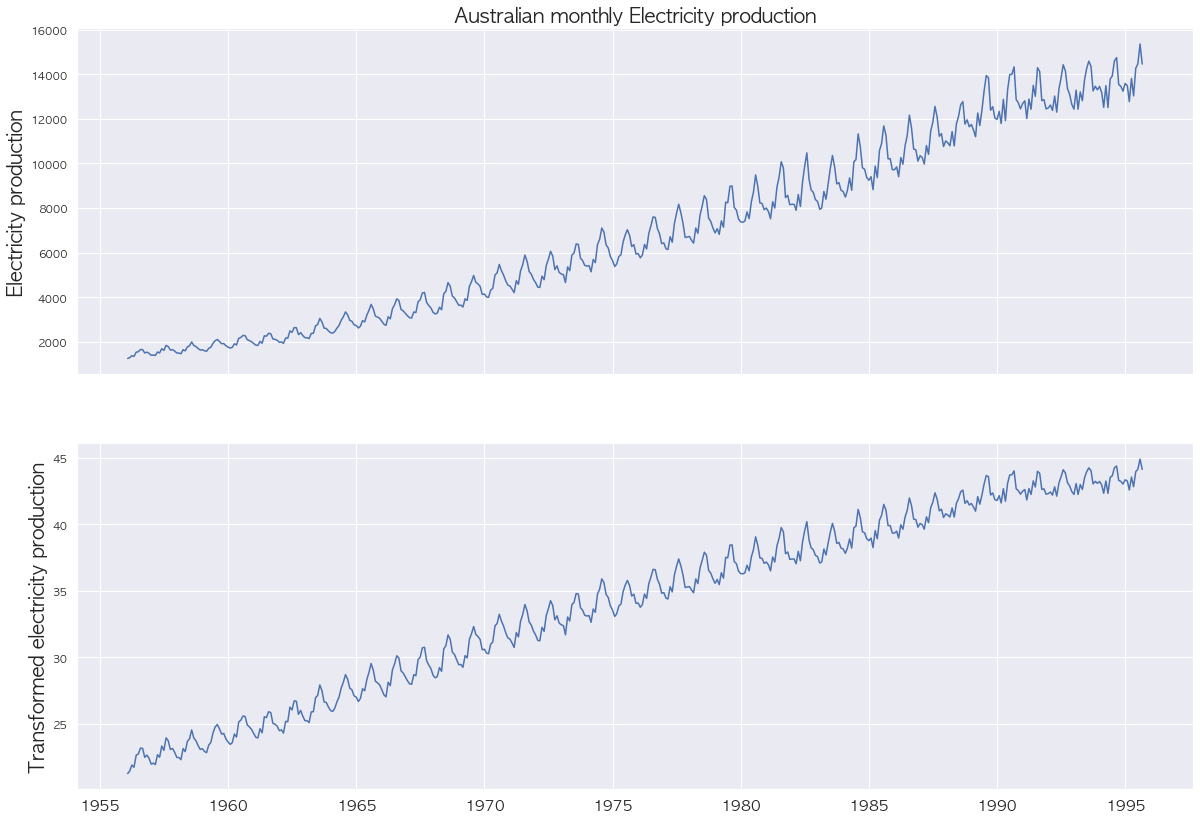

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(20, 14))
ax1 = plt.subplot(211)
plt.plot(elec['value'])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Electricity production',fontsize=20)
plt.title('Australian monthly Electricity production', fontsize=20)


ax2 = plt.subplot(212)
plt.plot(elec['Transformed'])
plt.setp(ax2.get_xticklabels(), fontsize=15)
plt.ylabel('Transformed electricity production',fontsize=20)

plt.show()


,value
index,
1900,276.79
1901,315.42
1902,314.87
1903,321.25
1904,314.54
...,...
1989,80.36
1990,79.79
1991,74.79


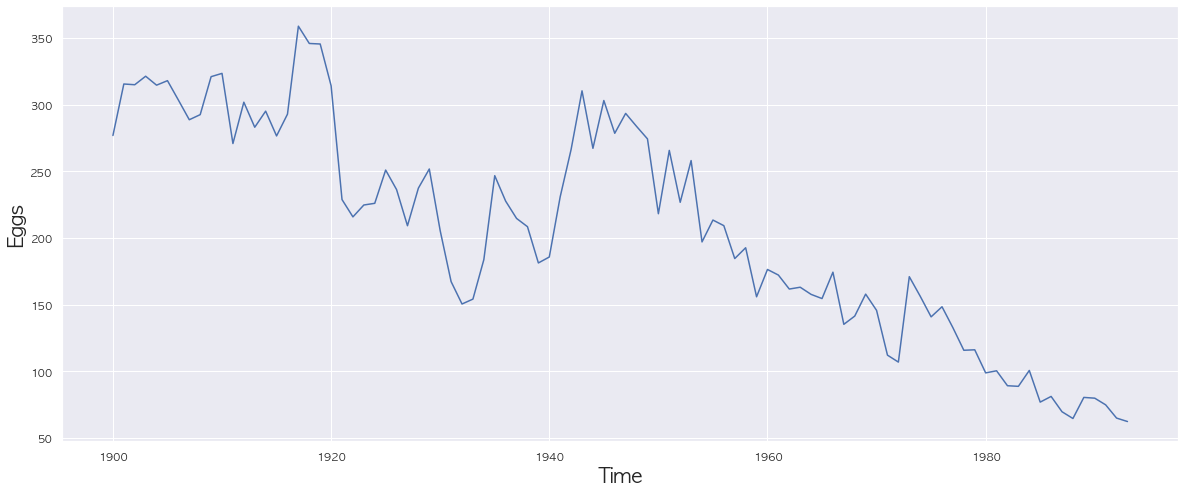

In [8]:
eggs = pd.read_csv('../data/eggdata.csv')
eggs.set_index('index', inplace=True)
display(eggs)

fig = plt.subplots(figsize=(20,8))
plt.plot(eggs)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Eggs', fontsize=20)
plt.show()